Markdown for Jupter: https://www.ibm.com/docs/en/watson-studio-local/1.2.3?topic=notebooks-markdown-jupyter-cheatsheet <br>
Jupyter Notebooks in VS code: https://code.visualstudio.com/docs/datascience/jupyter-notebooks

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
plt.style.use('ggplot')

# Load dataset and understand data information

In [2]:
test=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/2.Translation_Test/test_table.csv', parse_dates=['date'])
# parse_dates format date data as data format. https://towardsdatascience.com/4-tricks-you-should-know-to-parse-date-columns-with-pandas-read-csv-27355bb2ad0e
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


In [4]:
test.describe()

,user_id,date,conversion,test
count,453321.000000,453321,453321.000000,453321.000000
mean,499937.514728,2015-12-02 08:56:07.976334336,0.049579,0.476446
min,1.000000,2015-11-30 00:00:00,0.000000,0.000000
25%,249816.000000,2015-12-01 00:00:00,0.000000,0.000000
50%,500019.000000,2015-12-03 00:00:00,0.000000,0.000000
75%,749522.000000,2015-12-04 00:00:00,0.000000,1.000000
max,1000000.000000,2015-12-04 00:00:00,1.000000,1.000000
std,288665.193436,NaN,0.217073,0.499445


In [5]:
# check null data
test.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

In [6]:
# understand the values of each column
for col in test.columns:
    uniques=test[col].unique()
    print(col, ',', len(uniques),',',  uniques[:5])

user_id , 453321 , [315281 497851 848402 290051 548435]
date , 5 , <DatetimeArray>
['2015-12-03 00:00:00', '2015-12-04 00:00:00', '2015-11-30 00:00:00',
 '2015-12-01 00:00:00', '2015-12-02 00:00:00']
Length: 5, dtype: datetime64[ns]
source , 3 , ['Direct' 'Ads' 'SEO']
device , 2 , ['Web' 'Mobile']
browser_language , 3 , ['ES' 'Other' 'EN']
ads_channel , 6 , [nan 'Google' 'Facebook' 'Bing' 'Yahoo']
browser , 7 , ['IE' 'Chrome' 'Android_App' 'FireFox' 'Iphone_App']
conversion , 2 , [1 0]
test , 2 , [0 1]


In [7]:
user=pd.read_csv('/Users/ningzhang/Study/DataScience_takehome/Practices-DS-takehome-Ning/2.Translation_Test/user_table.csv')
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [8]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  452867 non-null  int64 
 1   sex      452867 non-null  object
 2   age      452867 non-null  int64 
 3   country  452867 non-null  object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [9]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


In [10]:
user.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

In [11]:
for col in user.columns:
    uniques=user[col].unique()
    print(col, ',', len(uniques), ',', uniques[:5])

user_id , 452867 , [765821 343561 118744 987753 554597]
sex , 2 , ['M' 'F']
age , 52 , [20 27 23 29 31]
country , 17 , ['Mexico' 'Nicaragua' 'Colombia' 'Venezuela' 'Spain']


# Merge two tables

In [12]:
# check uniqueness
print('Test users: ', len(test['user_id'].unique()), len(test['user_id'].unique())==len(test))
print('User users: ', len(user['user_id'].unique()), len(user['user_id'].unique())==len(user))

Test users:  453321 True
User users:  452867 True


In [13]:
data=pd.merge(left=test, right=user, how='left', on='user_id')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           453321 non-null  int64         
 1   date              453321 non-null  datetime64[ns]
 2   source            453321 non-null  object        
 3   device            453321 non-null  object        
 4   browser_language  453321 non-null  object        
 5   ads_channel       181877 non-null  object        
 6   browser           453321 non-null  object        
 7   conversion        453321 non-null  int64         
 8   test              453321 non-null  int64         
 9   sex               452867 non-null  object        
 10  age               452867 non-null  float64       
 11  country           452867 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 41.5+ MB


In [15]:
data.describe()

,user_id,date,conversion,test,age
count,453321.000000,453321,453321.000000,453321.000000,452867.000000
mean,499937.514728,2015-12-02 08:56:07.976334336,0.049579,0.476446,27.130740
min,1.000000,2015-11-30 00:00:00,0.000000,0.000000,18.000000
25%,249816.000000,2015-12-01 00:00:00,0.000000,0.000000,22.000000
50%,500019.000000,2015-12-03 00:00:00,0.000000,0.000000,26.000000
75%,749522.000000,2015-12-04 00:00:00,0.000000,1.000000,31.000000
max,1000000.000000,2015-12-04 00:00:00,1.000000,1.000000,70.000000
std,288665.193436,NaN,0.217073,0.499445,6.776678


In [16]:
data.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
sex                    454
age                    454
country                454
dtype: int64

# A/B test

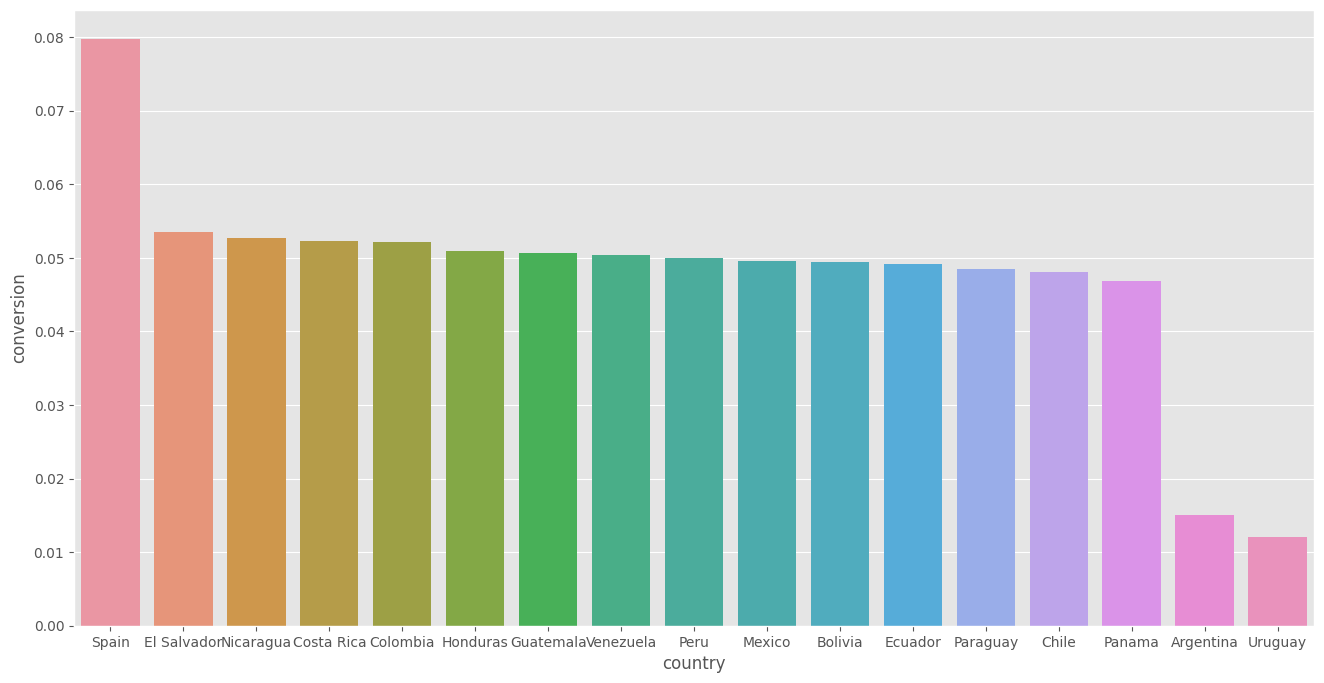

In [17]:
# Prove that Spain coverts better than other LatAm countries
groupby_country=data[data['test']==0][['conversion', 'country']].groupby('country').mean()
groupby_country.head()
groupby_country=groupby_country.reset_index()
groupby_country=groupby_country.sort_values(by='conversion', ascending=False)
groupby_country.head()

#visualization
fig, ax=plt.subplots(figsize=(16,8))
sns.barplot(data=groupby_country, x='country', y='conversion', ax=ax)
plt.show()

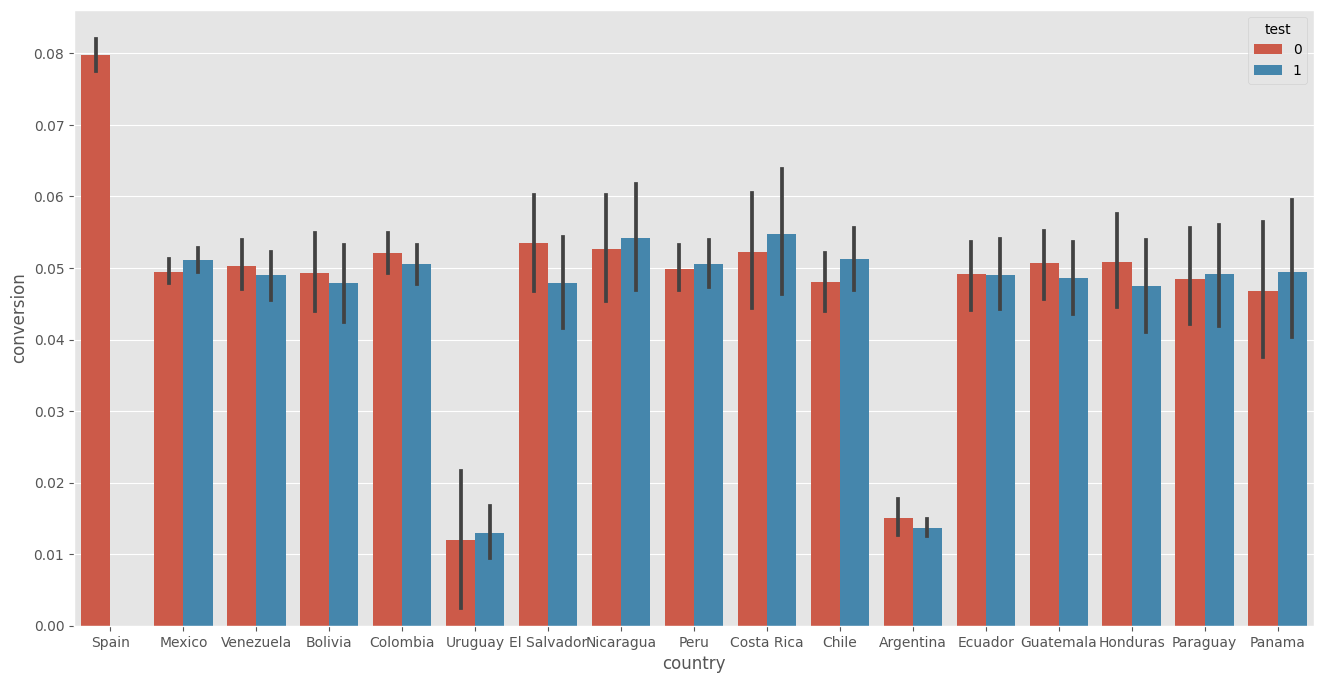

In [18]:
fig,ax=plt.subplots(figsize=(16,8))
sns.barplot(data=data, x='country', y='conversion', hue='test', ax=ax)
plt.show()

# T-test
## 1. T-test vs Z-test
- T-test refers to a type of parametric test that is applied to identify, how the means of two sets of data differ from one another when variance is not given. 
- Z-test implies a hypothesis test which ascertains if the means of two datasets are different from each other when variance is given. <br>
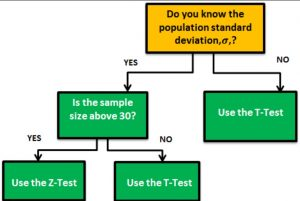

## 2. T-test value 
- The t-value measures the size of the difference relative to the variation in your sample data.
- The closer T is to 0, the more likely there isn't a significant difference.

In [21]:
# AB test, focus on data for comparing but not Spain data
test_data=data[data['country']!='Spain']
test_val=test_data[test_data['test']==1]['conversion'].values
cotl_val=test_data[test_data['test']==0]['conversion'].values
print(type(test_val))
print(test_val.mean(), cotl_val.mean())

p_values=ttest_ind(test_val,cotl_val, equal_var=False) # equal_var=False means the two samples have different variance
print(p_values)

<class 'numpy.ndarray'>
0.043424713982118966 0.04833042316066309
Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


The null hypothsis is that the two independent samples have a identical mean. <br> 
The p value is big that we can't reject the null hypothese. So the use of local translater can't bring a better conversion.

# Analysis

In [22]:
data=data[data['country']!='Spain']
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


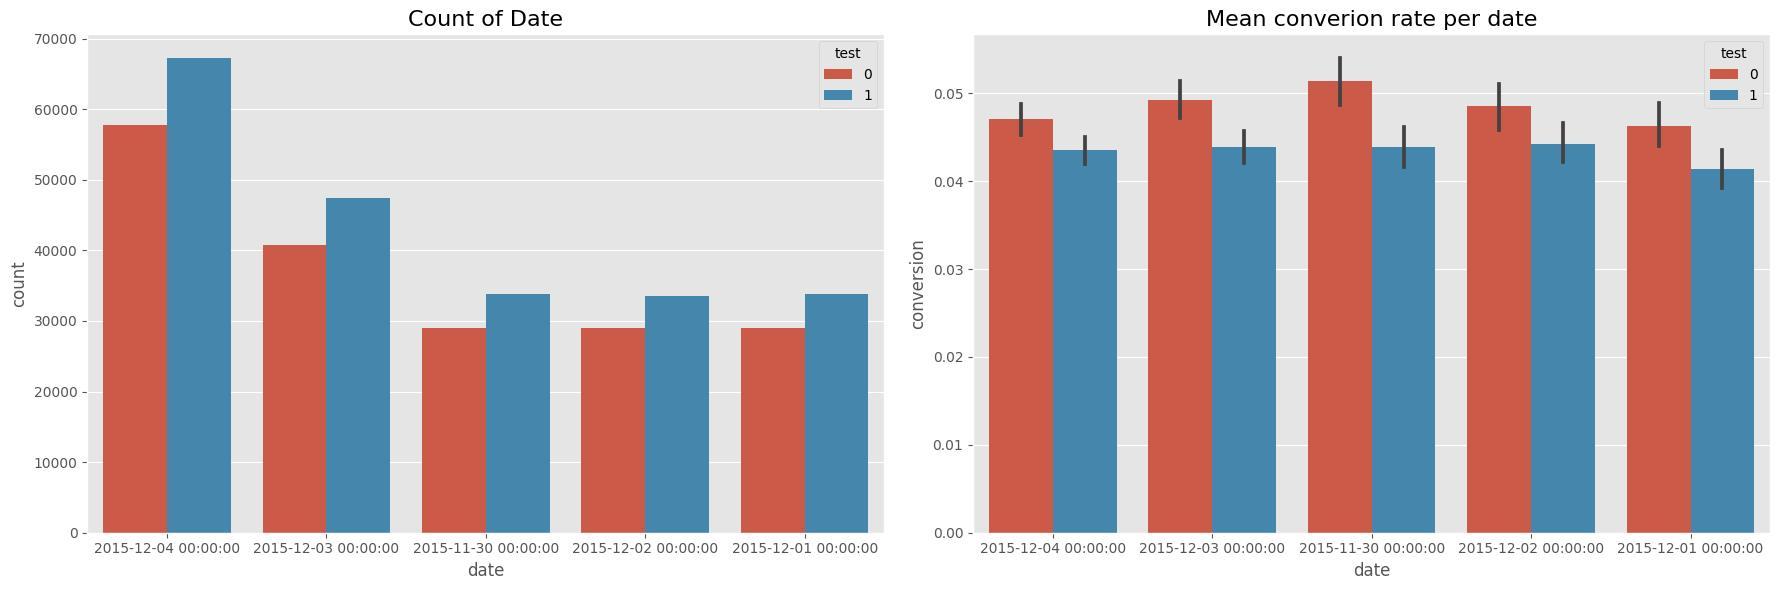

In [25]:
# visualization of different 
fig,ax=plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(data=data, x='date', hue='test', ax=ax[0])
ax[0].set_title('Count of Date', fontsize=16)

sns.barplot(data=data, x='date', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean converion rate per date', fontsize=16)
plt.tight_layout()
plt.show()

From the date visualization, the use of local tranlator didn't improve the conversion rate, which even aggregates the conversion effect.

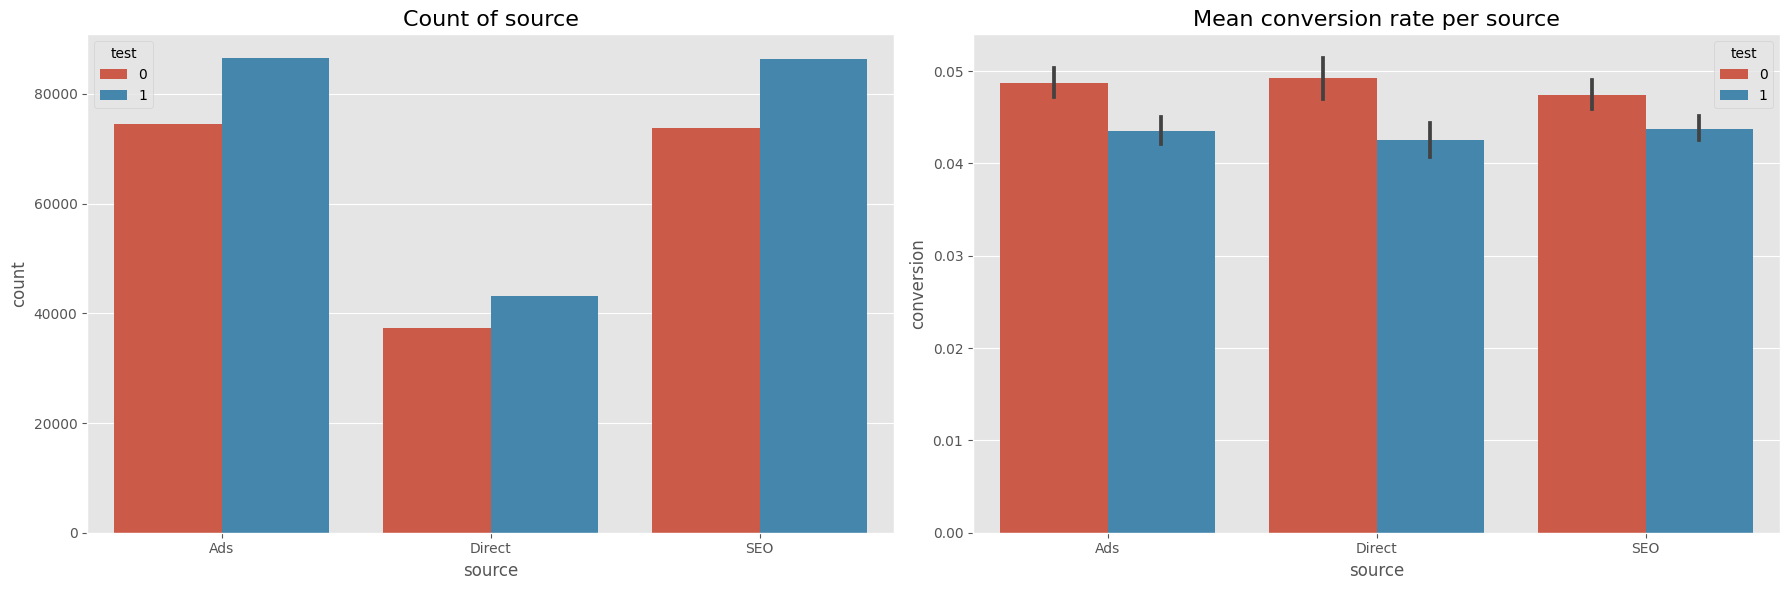

In [30]:
# visualization of different sources
fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(18,6))
sns.countplot(data=data, x='source', hue='test', ax=ax[0])
ax[0].set_title('Count of source', fontsize=16)

sns.barplot(data=data, x='source', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per source', fontsize=16)
plt.tight_layout()
plt.show()

The visualization of source also indicates the fact that with more tested cases, the conversion rate doesn't go better.

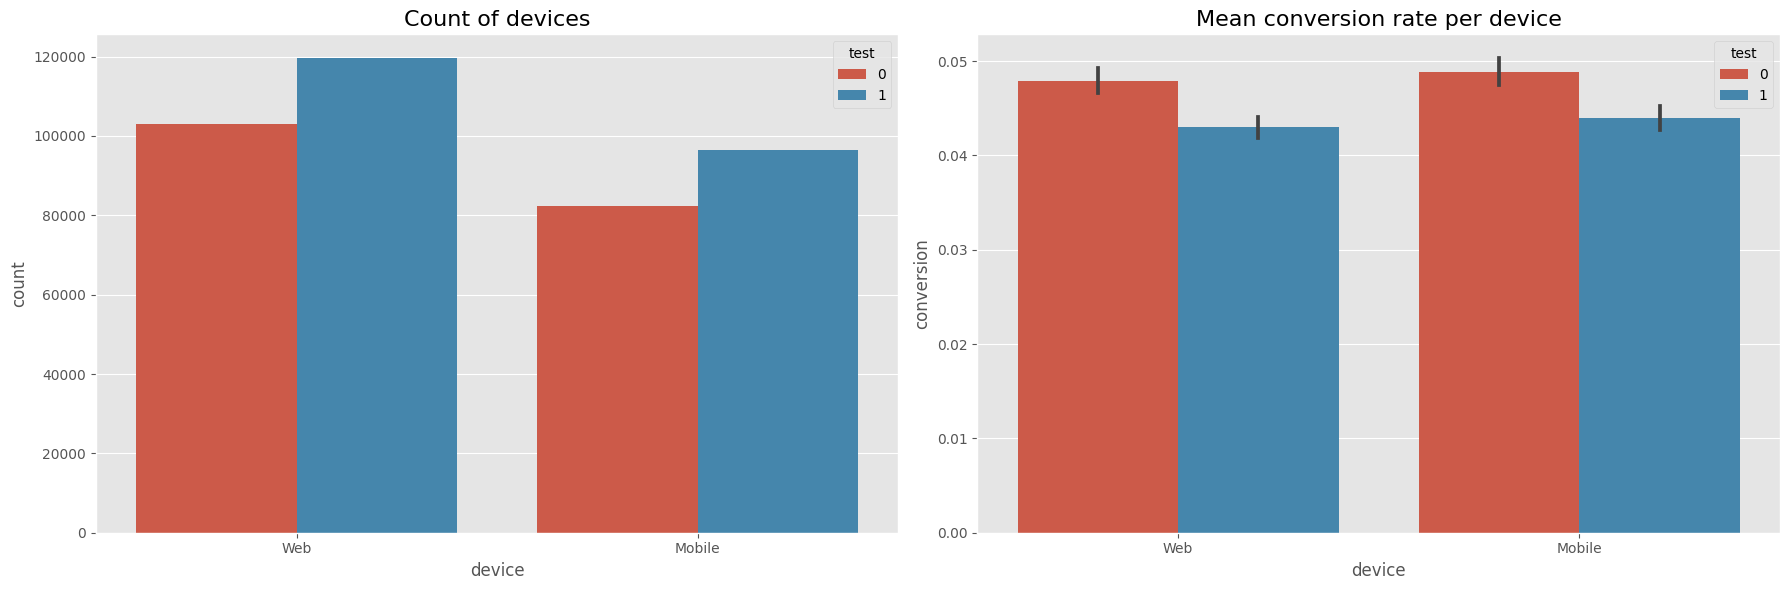

In [32]:
# visualization of devices
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x='device', hue='test', ax=ax[0])
ax[0].set_title('Count of devices', fontsize=16)

sns.barplot(data=data, x='device', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per device', fontsize=16)

plt.tight_layout()
plt.show()

With more test case on local translators, the conversion effect is weakened.

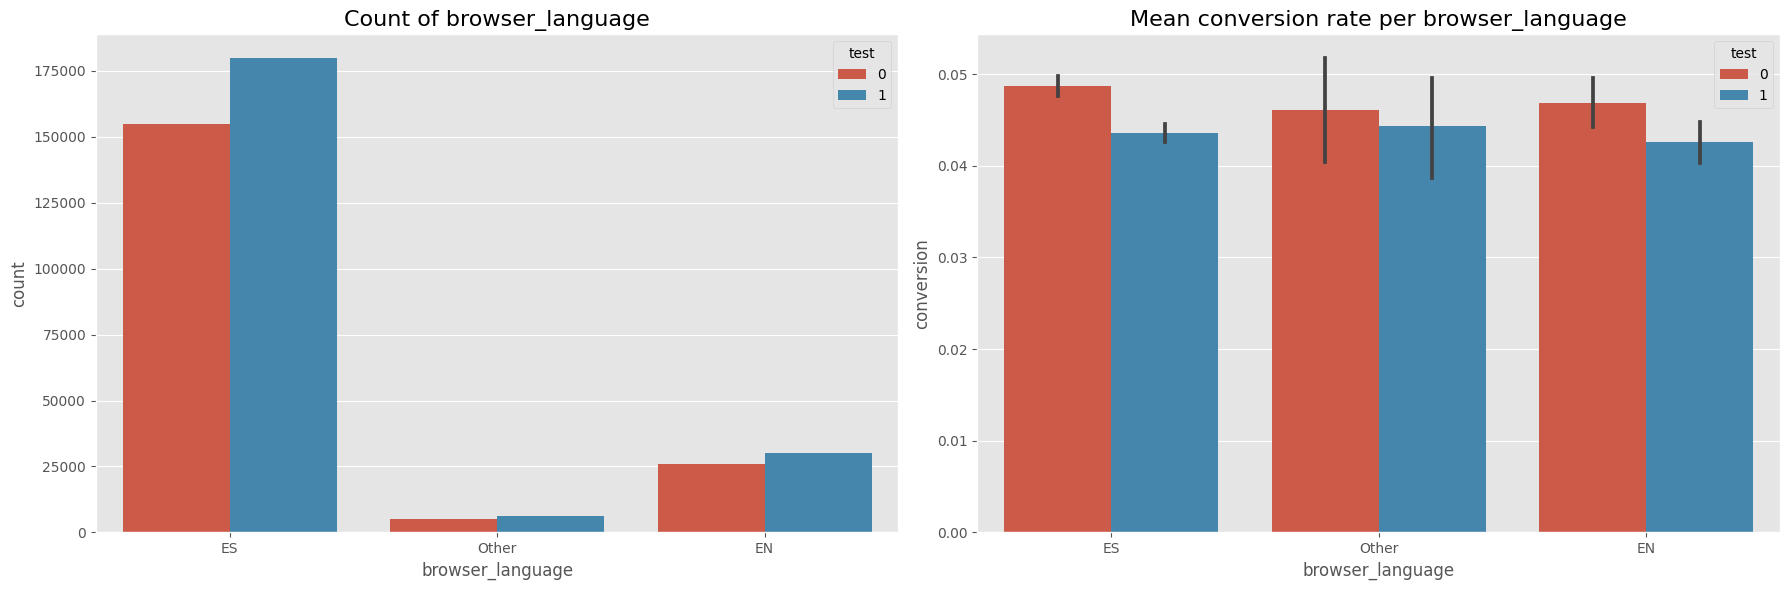

In [33]:
# visualization of language
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x='browser_language', hue='test', ax=ax[0])
ax[0].set_title('Count of browser_language', fontsize=16)

sns.barplot(data=data, x='browser_language', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per browser_language', fontsize=16)

plt.tight_layout()
plt.show()

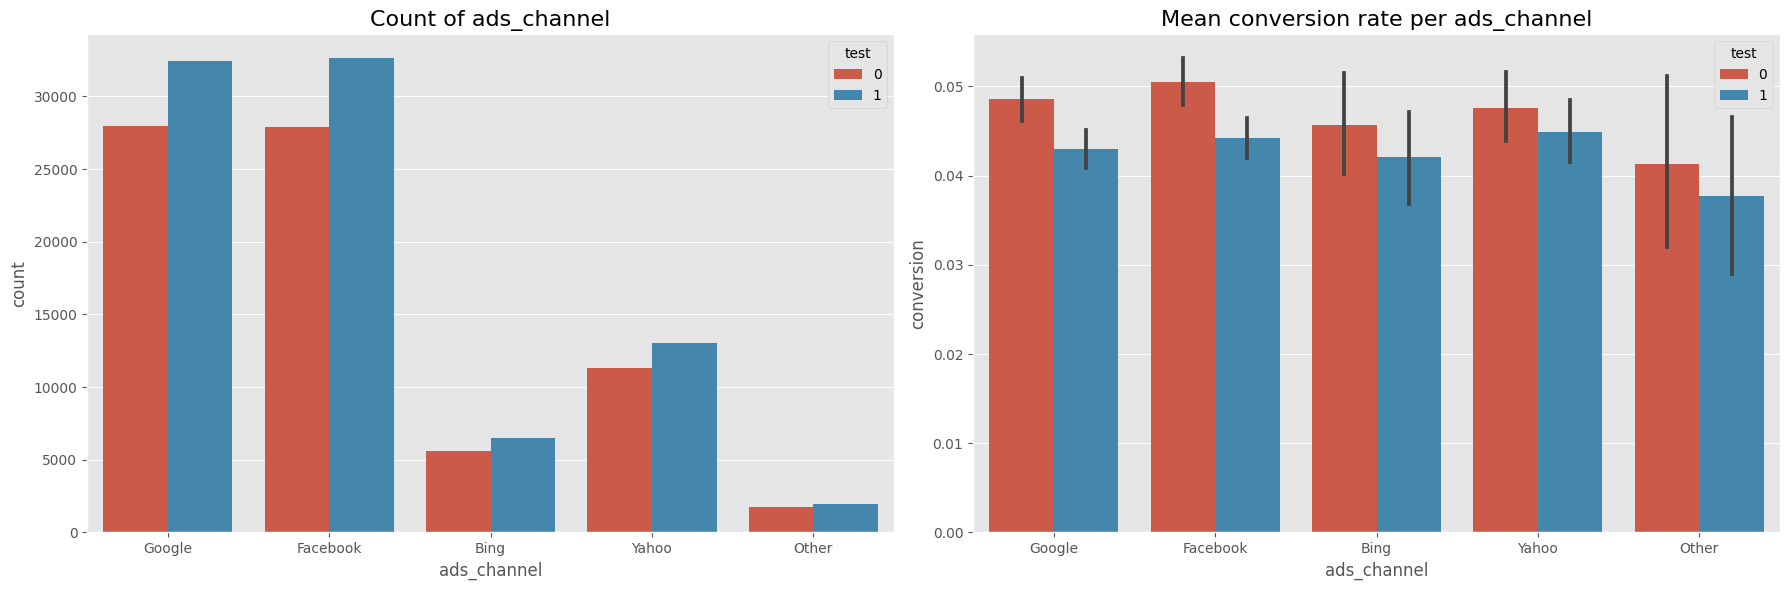

In [34]:
# visualization of ads_channel
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x='ads_channel', hue='test', ax=ax[0])
ax[0].set_title('Count of ads_channel', fontsize=16)

sns.barplot(data=data, x='ads_channel', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per ads_channel', fontsize=16)

plt.tight_layout()
plt.show()

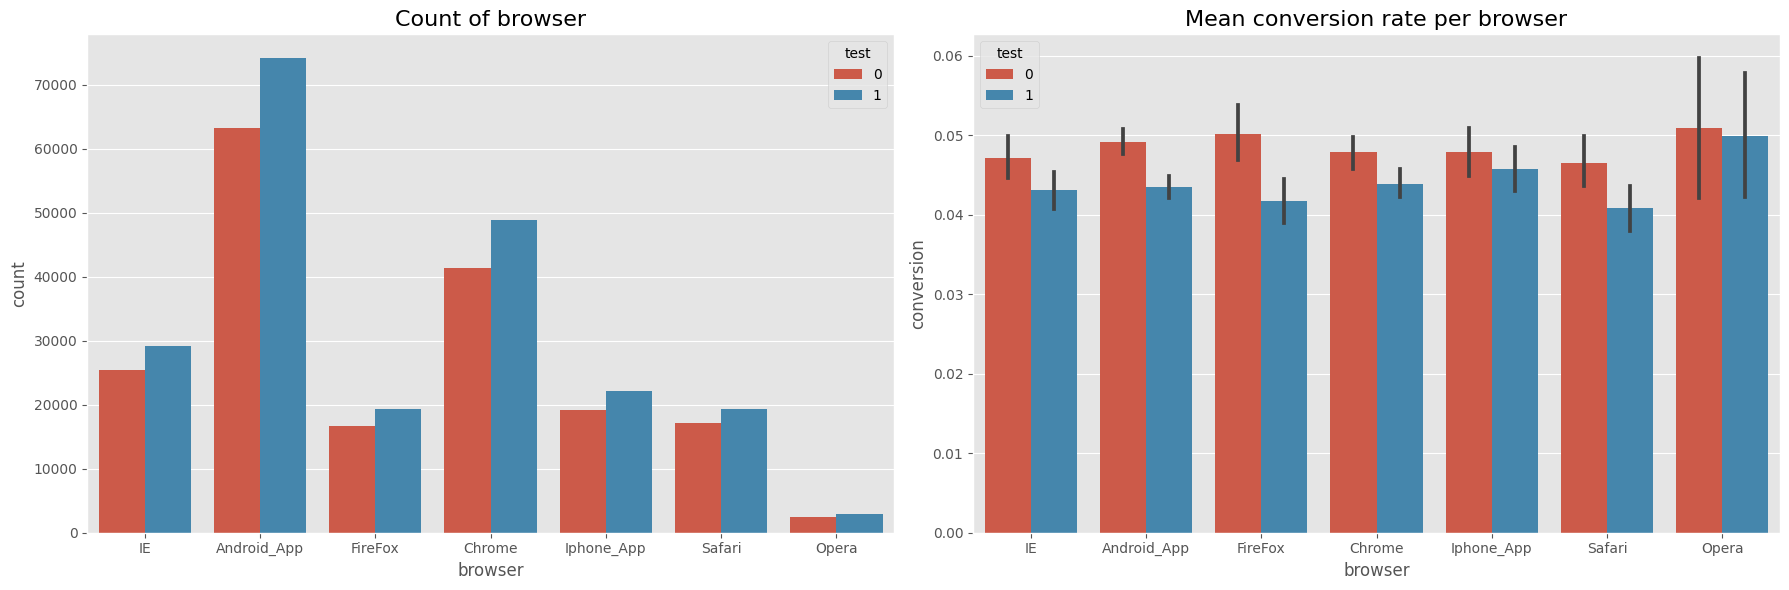

In [35]:
# visualization of browser
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x='browser', hue='test', ax=ax[0])
ax[0].set_title('Count of browser', fontsize=16)

sns.barplot(data=data, x='browser', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per browser', fontsize=16)

plt.tight_layout()
plt.show()

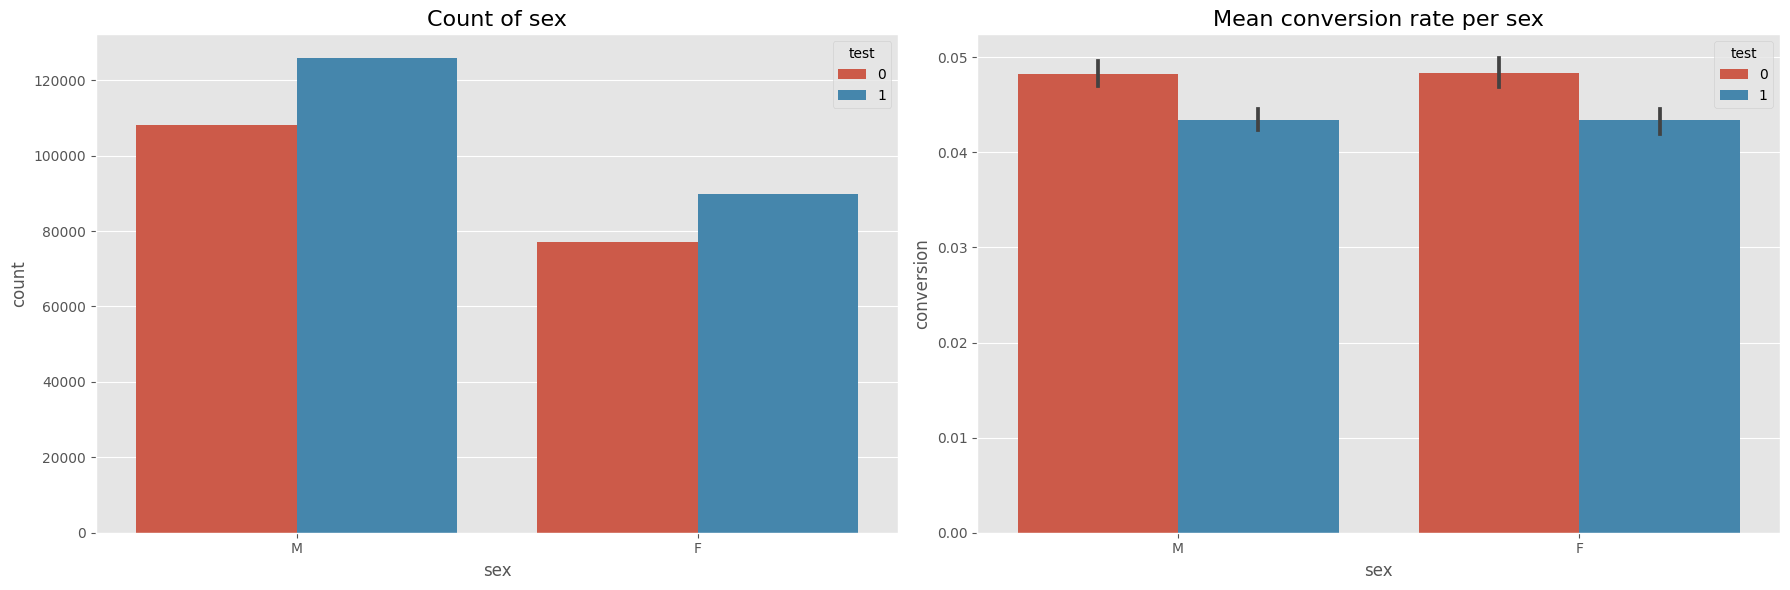

In [36]:
# visualization of sex
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x='sex', hue='test', ax=ax[0])
ax[0].set_title('Count of sex', fontsize=16)

sns.barplot(data=data, x='sex', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per sex', fontsize=16)

plt.tight_layout()
plt.show()

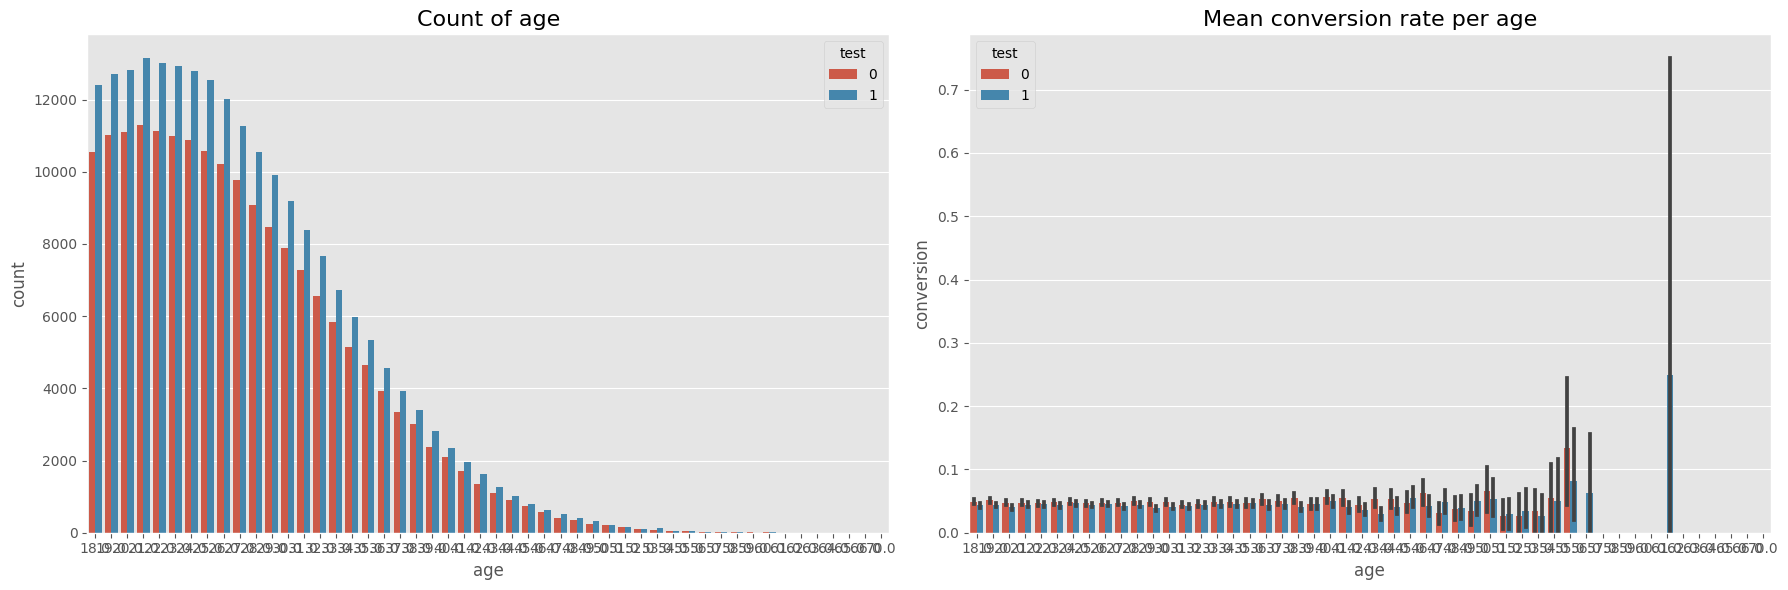

In [37]:
# visualization of age
fig, ax=plt.subplots(nrows=1, ncols=2, figsize=(18,6))
sns.countplot(data=data, x='age', hue='test', ax=ax[0])
ax[0].set_title('Count of age', fontsize=16)

sns.barplot(data=data, x='age', y='conversion', hue='test', ax=ax[1])
ax[1].set_title('Mean conversion rate per age', fontsize=16)

plt.tight_layout()
plt.show()

All above explotary data analyses show the same trend that the using of local translators doesn't help the increase of the conversion rate, which even hampers the conversion result.

In [45]:
# Understand the conversion status based on country
countries=[name for name in data['country'].unique() if name is not np.nan]
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-value'))
print('-'*65)

for country in countries:
    test_val=data[(data['country']==country)&(data['test']==1)]['conversion'].values
    cont_val=data[(data['country']==country)&(data['test']==0)]['conversion'].values
    t=test_val.mean()
    c=cont_val.mean()
    p_value=ttest_ind(test_val, cont_val, equal_var=False).pvalue
    print('{0:15s} {1:>15f} {2:>15f} {3:>10f}'.format(country, t, c, p_value))


Country               Test Rate    Control Rate    P-value
-----------------------------------------------------------------
Mexico                 0.051186        0.049495   0.165544
Venezuela              0.048978        0.050344   0.573702
Bolivia                0.047901        0.049369   0.718885
Colombia               0.050571        0.052089   0.423719
Uruguay                0.012907        0.012048   0.879764
El Salvador            0.047947        0.053554   0.248127
Nicaragua              0.054177        0.052647   0.780400
Peru                   0.050604        0.049914   0.771953
Costa Rica             0.054738        0.052256   0.687876
Chile                  0.051295        0.048107   0.302848
Argentina              0.013725        0.015071   0.335147
Ecuador                0.048988        0.049154   0.961512
Guatemala              0.048647        0.050643   0.572107
Honduras               0.047540        0.050906   0.471463
Paraguay               0.049229        0.048493  

- The P value for every country is large, indicating that it is not significant to reject the null hypothesis that the sample data sets with local translators and without local translators have the identical mean.
- The A/B test shows the negative effect of using local translators.